# Stock Market Analysis + Prediction

## <b> Objectives</b>
1.) What was the change in price of stock over time<br>
2.) What was the daily return of the stock on average<br>
3.) What was the moviing average of various stocks<br>
4.) what was the correlation b/w different stocks<br>
5.) How much value do we put at risk by investing in a particular stock<br>
6.) Predicting the future stock price 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

### Getting the Data
We got our data from the Stooq Finance website. Stooq offer historic daily, hourly, and minutely data on indicies, ETFs, stocks, bonds, forex and cryptocurrencies. In order to obtain the data you need to download by region and then by frequency.

## 1.) What was the change in price of stock over time
Analysing the basic attributes of a stock

In [33]:
# Companies we will be using for analysis
companies = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

for stock in companies:
    globals()[stock] = pdr.get_data_stooq(stock, start, end)
    
company_list = [AAPL, MSFT, GOOG, AMZN]
company_name = ['Apple', 'Microsoft', 'Google', 'Amazon']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

Open    High     Low   Close     Volume company_name
Date                                                               
2024-10-02  225.890  227.37  223.02  226.78   32880605        Apple
2024-10-01  229.520  229.65  223.74  226.21   63285048        Apple
2024-09-30  230.040  233.00  229.65  233.00   54793391        Apple
2024-09-27  228.460  229.52  227.30  227.79   34025967        Apple
2024-09-26  227.300  228.50  225.41  227.52   36636707        Apple
2024-09-25  224.930  227.29  224.02  226.37   42308715        Apple
2024-09-24  228.645  229.35  225.73  227.37   43556068        Apple
2024-09-23  227.340  229.45  225.81  226.47   54146023        Apple
2024-09-20  229.970  233.09  227.62  228.20  318679888        Apple
2024-09-19  224.990  229.82  224.63  228.87   66781315        Apple

Through the above output we can see the cange over the past 10 days.
We can see that the data is numeric and the date is index of data.
(Note: Weekends not included as market is closed)

### Descriptive Statisticss about the Data

In [3]:
AAPL.describe()

Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   194.431539  196.225367  192.776090  194.619563  5.943171e+07
std     20.153022   20.376933   19.695371   20.068607  2.972330e+07
min    165.350000  166.400000  164.075000  164.930000  2.404834e+07
25%    176.990000  179.341250  176.435000  178.817500  4.453062e+07
50%    189.905000  191.025000  188.860000  189.855000  5.291800e+07
75%    214.702500  216.980000  212.065000  214.777500  6.502268e+07
max    236.480000  237.230000  233.090000  234.820000  3.186799e+08

From this we can infer that:<br>
1)On average the stock for APPLE opens and closes at 193<br>
2)The stock varies or spread for 19 for closing price, this means max variation of 19<br>
3)Max closing price for Apple stock in past year is 234.82<br>
4)Min closing price for past one year is 164.93<br>

### Information about data

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-10-02 to 2023-10-03
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   company_name  252 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.8+ KB


### Closing Price
The closing price is the last price at which a security traded during the regular trading day. A security's closing price is the standard benchmark used by investors to track its performance over time. 

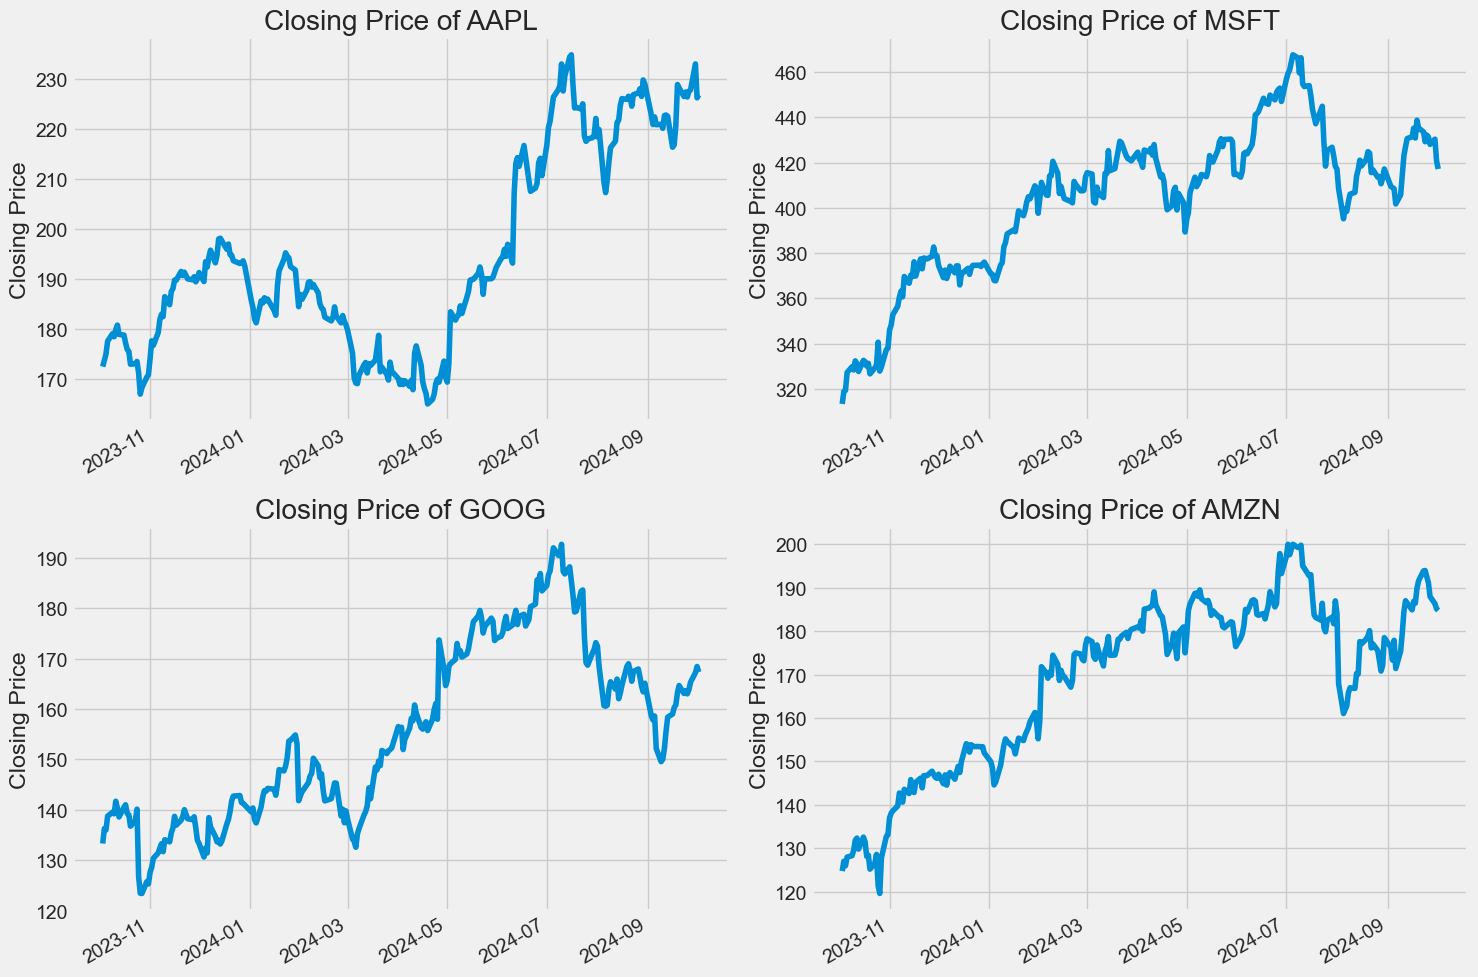

In [5]:
# Plotting historical view of closing price
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f'Closing Price of {companies[i-1]}')

plt.tight_layout()

### Volume of Sales
Volume in the stock market is the total number of shares traded during a specific time, including all buys and sells. Volume is an indicator that means the total number of shares traded within a defined timeframe or throughout a trading session

Importance of Volume:

- Generally, securities with higher daily volume are more liquid than those without since they are more active.
- 
Volume is an important indicator in technical analysis because it measures the relative significance of a market move
- 
The higher the volume during a price move, the more significant the move; the lower the volume during a price move, the less significant the mov.


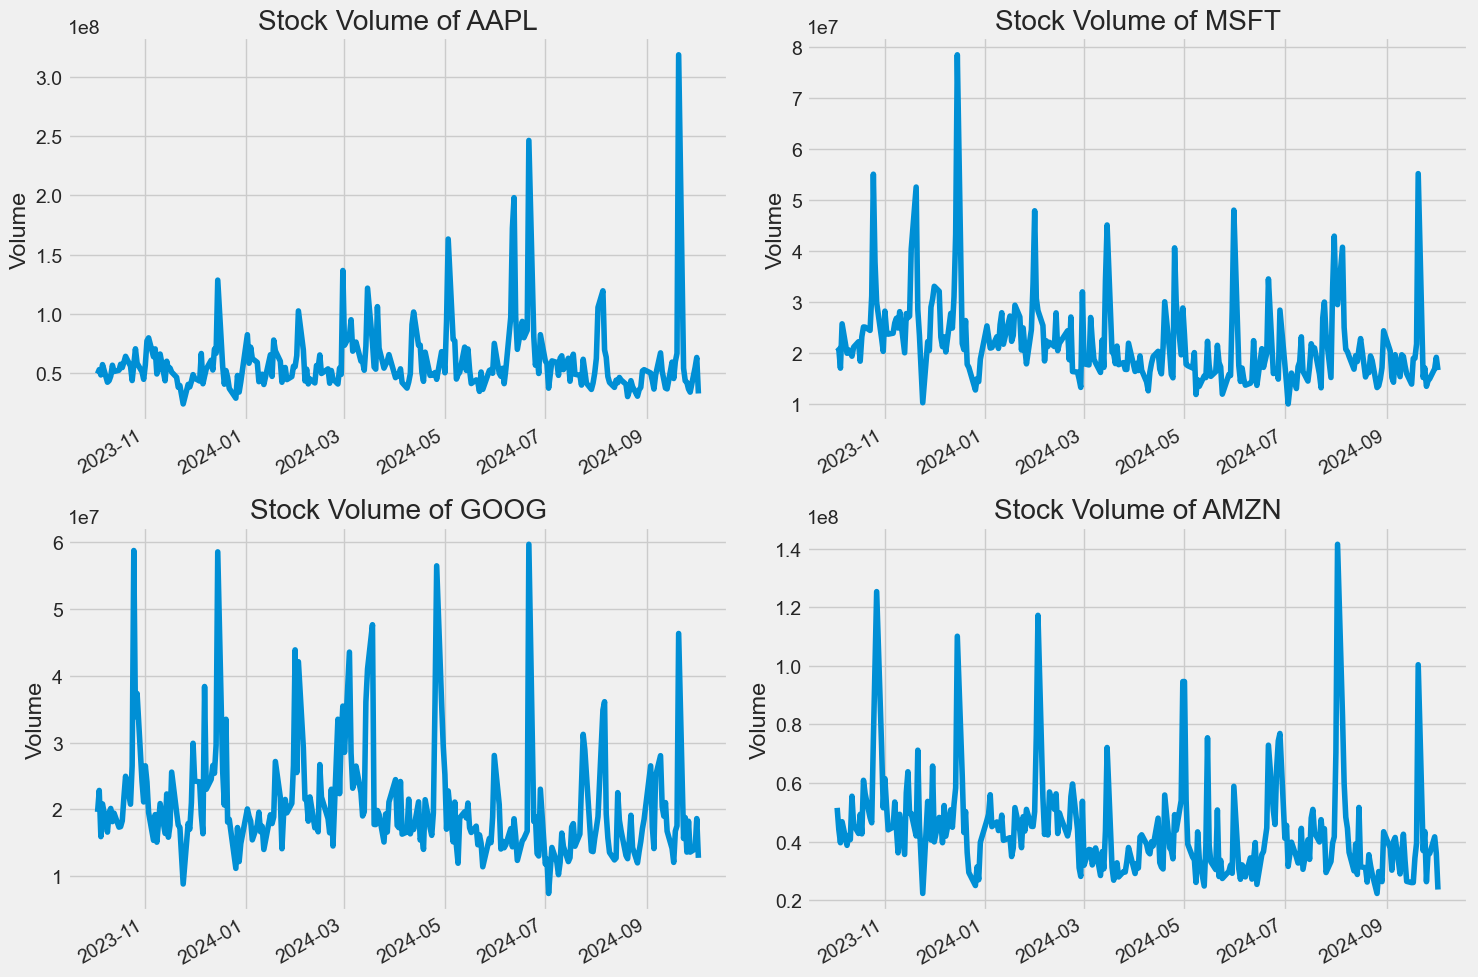

In [6]:
# Plotting total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Stock Volume of {companies[i-1]}')

plt.tight_layout()

## 2.) What was the moving average of various stocks?
The movung average is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average price is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.
- The most common applications of moving averages are to identify trend direction and to determine support and resistance levels
- When asset prices cross over their moving averages, it may generate a trading signal for technical traders.
- While moving averages are useful enough on their own, they also form the basis for other technical indicators such as the moving average convergence divergence (MACD).

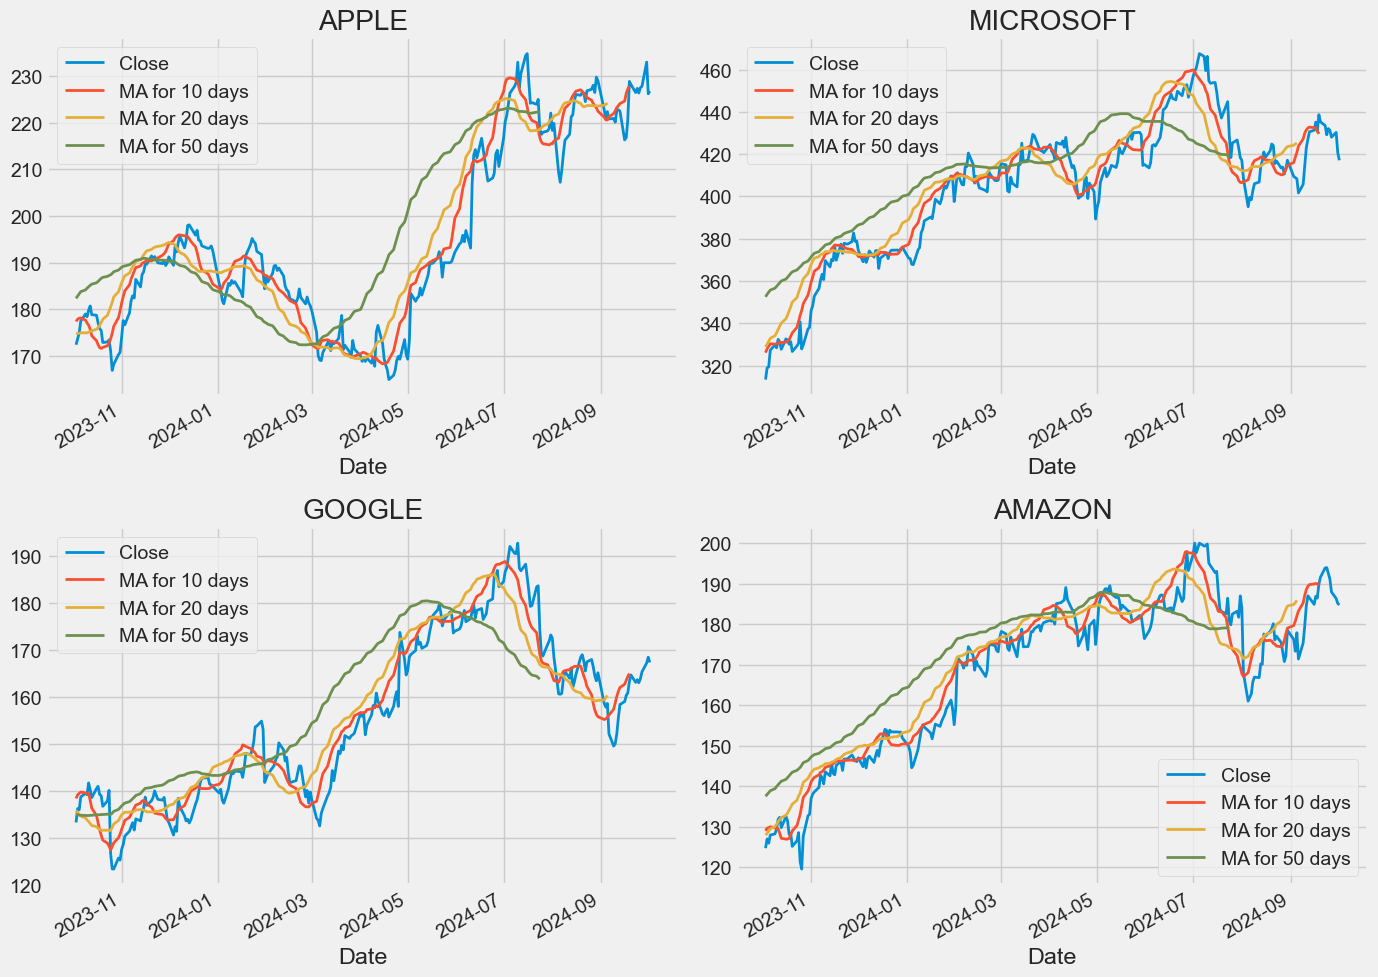

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))


AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0], linewidth=2)
axes[0,0].set_title("APPLE")

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1], linewidth=2)
axes[0,1].set_title("MICROSOFT")

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0], linewidth=2)
axes[1,0].set_title("GOOGLE")

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1], linewidth=2)
axes[1,1].set_title("AMAZON")

fig.tight_layout()

From the graphs of all the companies we can infer that moving average of 10 days and 20 days are tracing the closing price most accurately. From the moving average of 50 days we can tell the general trend of stock  but can't use in computation.

## 3.) What are the daily return of the stock on average?
From here on we will be doing risk analysis of the stocks.  

In [8]:
# finding perecntage change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()
    

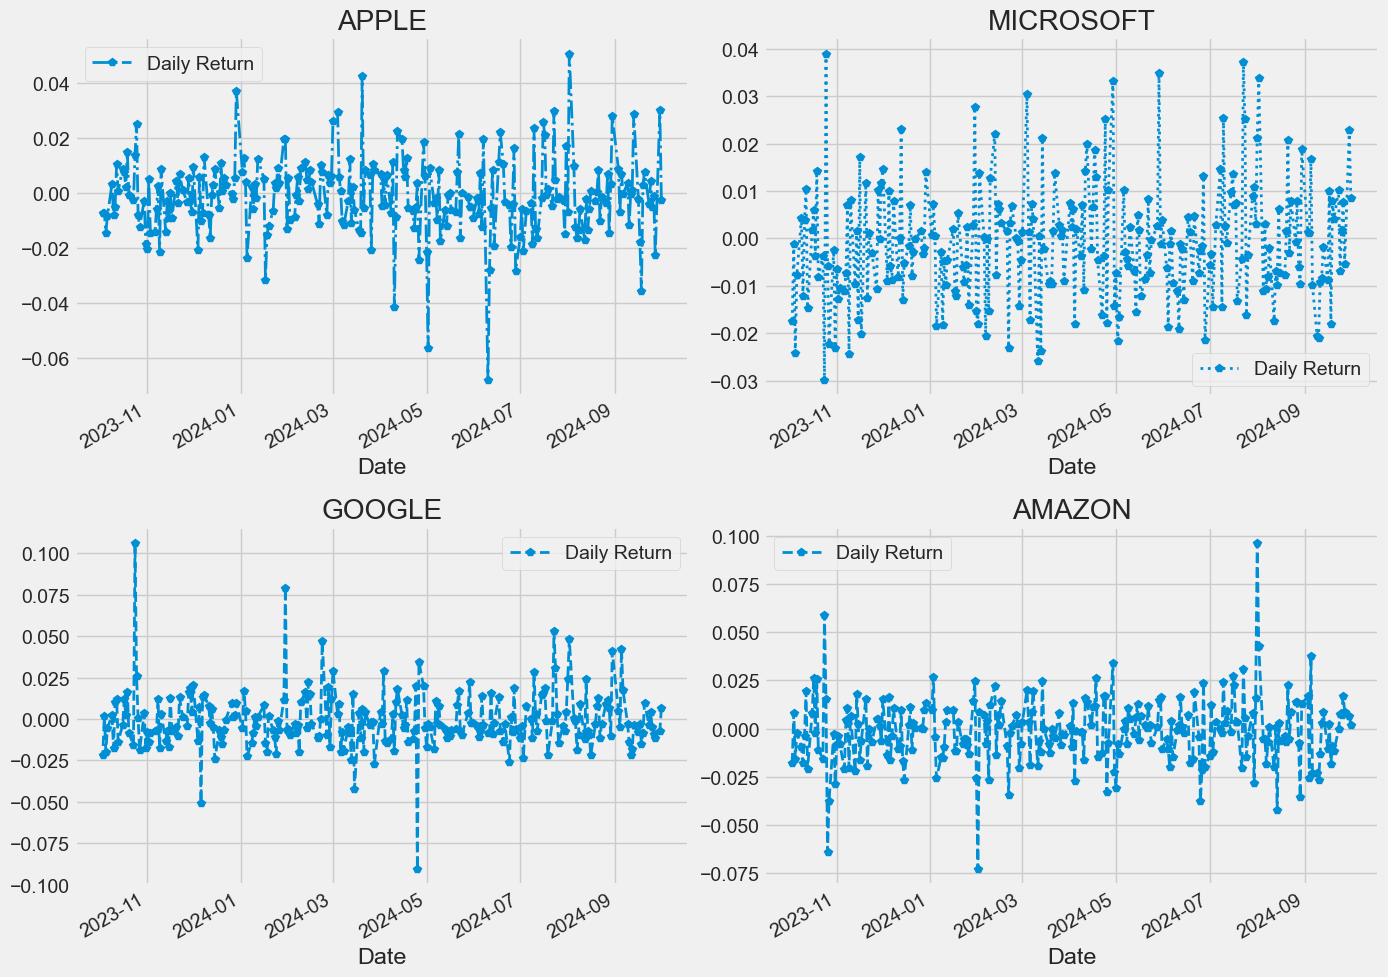

In [9]:
# plotting the Daily Return Percentage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-.',marker='p', linewidth=2)
axes[0,0].set_title('APPLE')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle=':',marker='p', linewidth=2)
axes[0,1].set_title('MICROSOFT')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--',marker='p', linewidth=2)
axes[1,0].set_title('GOOGLE')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--',marker='p', linewidth=2)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

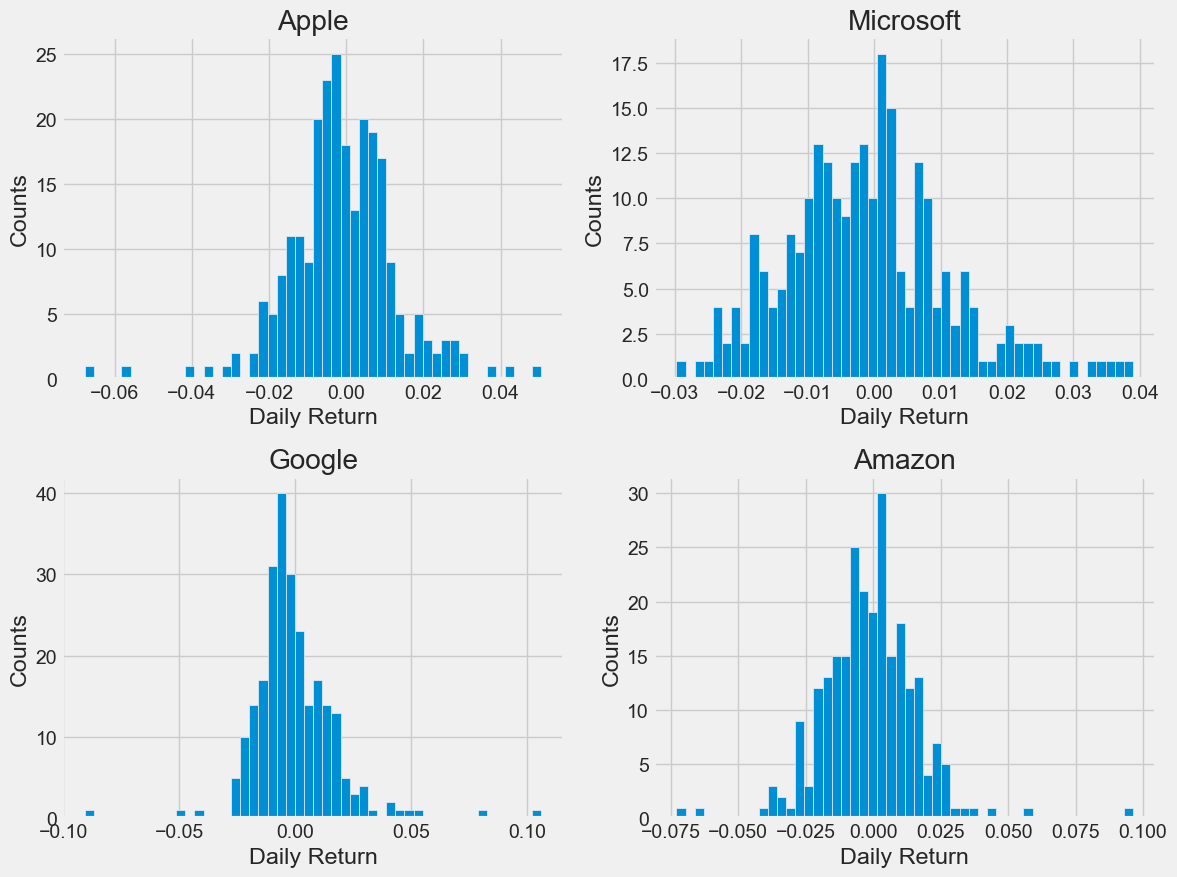

In [10]:
# plotting average daily return using a kde histogram
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()

<h5>Key Takeaways from the graphs:</h5>
The shape of the histogram is roughly <i>bell shaped</i> suggesting most daily return are close to zero.The $skewness$ suggest that there are some days where loss or gains is more comparatively.<br>
for ex - In case of Microsoft, the graph is right skewed meaning there are more days with negative returns than gains. <br>
<b>Volatility Assessment</b> :
The shape and spread of the histogram reveal the volatility of the stock. A wider spread indicates greater price fluctuations, meaning higher risk.
Identifying Periods of High Volatility: Traders can use this information to adjust their trading strategies during periods of high volatility to manage risk effectively
<b>Calculating Expected Returns</b>: The distribution can be used to calculate expected returns and assess the potential reward-to-risk ratio of a trade.

## 4.) What was hte correlation b/w different stocks cllosing price?
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.
The range is -1 to +1.<br>
Correlation measures assocaition but doesn't show causation 

In [11]:
# Making a closing price dataframe
closing_df = pdr.get_data_stooq(companies, start=start, end=end)['Close']

# Making a new return dataframe
tech_ret = closing_df.pct_change()
tech_ret.sample(5)

Symbols         AAPL      MSFT      GOOG      AMZN
Date                                              
2024-01-04  0.004029  0.000517  0.004731 -0.004613
2024-04-05  0.006708  0.002025 -0.014406 -0.001349
2024-03-20  0.042598 -0.009642  0.006320  0.000000
2023-11-14 -0.003032  0.001623 -0.006966  0.018156
2024-09-10 -0.011452 -0.020896 -0.014065 -0.026935

Now we can compare the daily percentage return of two stocks to check how correlated.

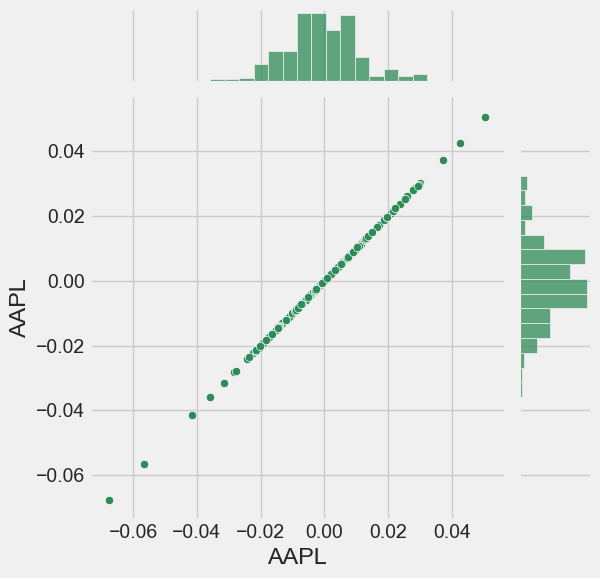

In [12]:
# Comparing a stock to itself with reult in correlation of 1
sns.jointplot(x='AAPL', y='AAPL', data=tech_ret, kind='scatter', color='seagreen')

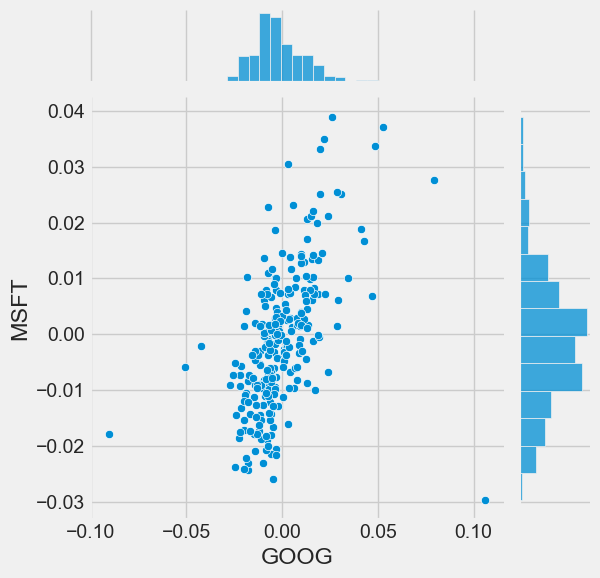

In [13]:
# Comparing daily return of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_ret, kind='scatter')

If two stocks are perfectly(positively) correlated to each other then a linear relationship b/w its daily return values should occur
<br>Using Seaborn we can do this analysis for all companies using the <b>pairplot</b> func

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


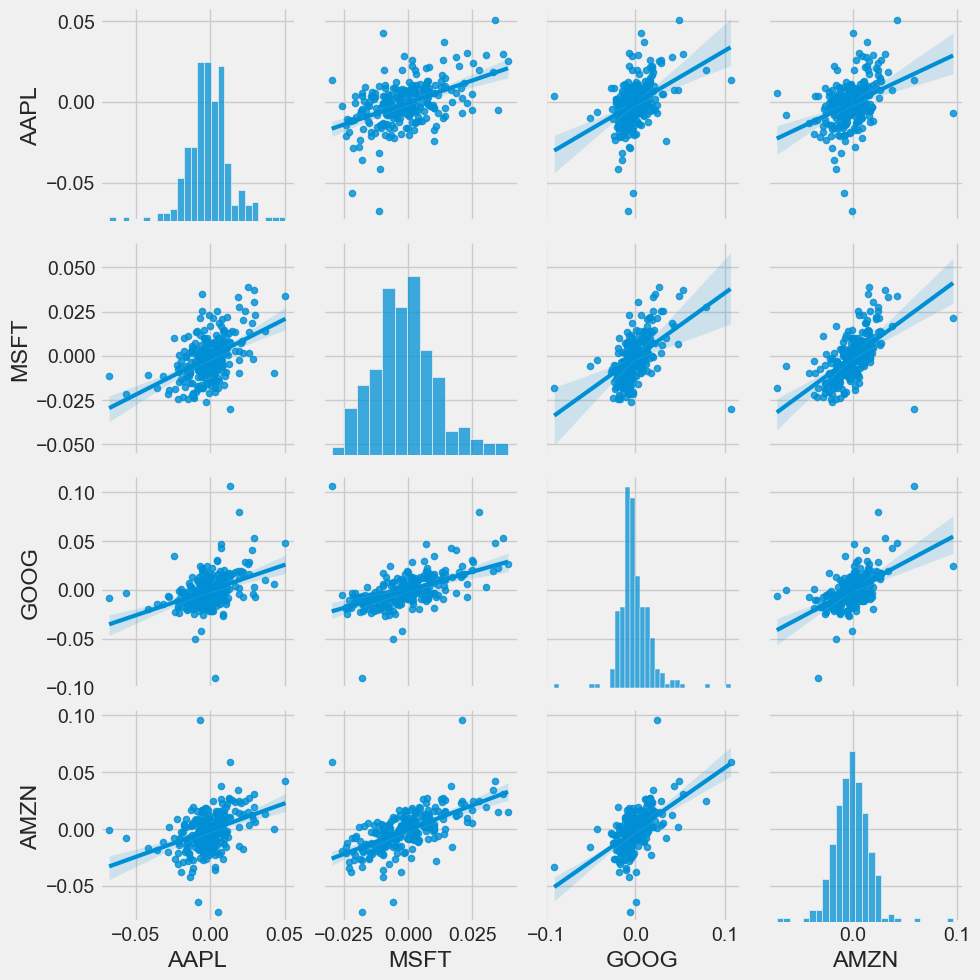

In [14]:
# Calling pairplot on our dataframe 
sns.pairplot(tech_ret, kind='reg', 
             plot_kws={'line_kws': {'linewidth': 3}, 'scatter_kws': {'s': 20}}) 

A quick glance shows an interesting correlation b/w Google and Amazon daily returns. It might be interesting to investigate that comparision individually<br>
We can also use $sns.PairGrid()$ for full control of the figure, including what kind of plots go in the diagonal and the upper triangle, the lower triangle. Below is an example of PairGrid

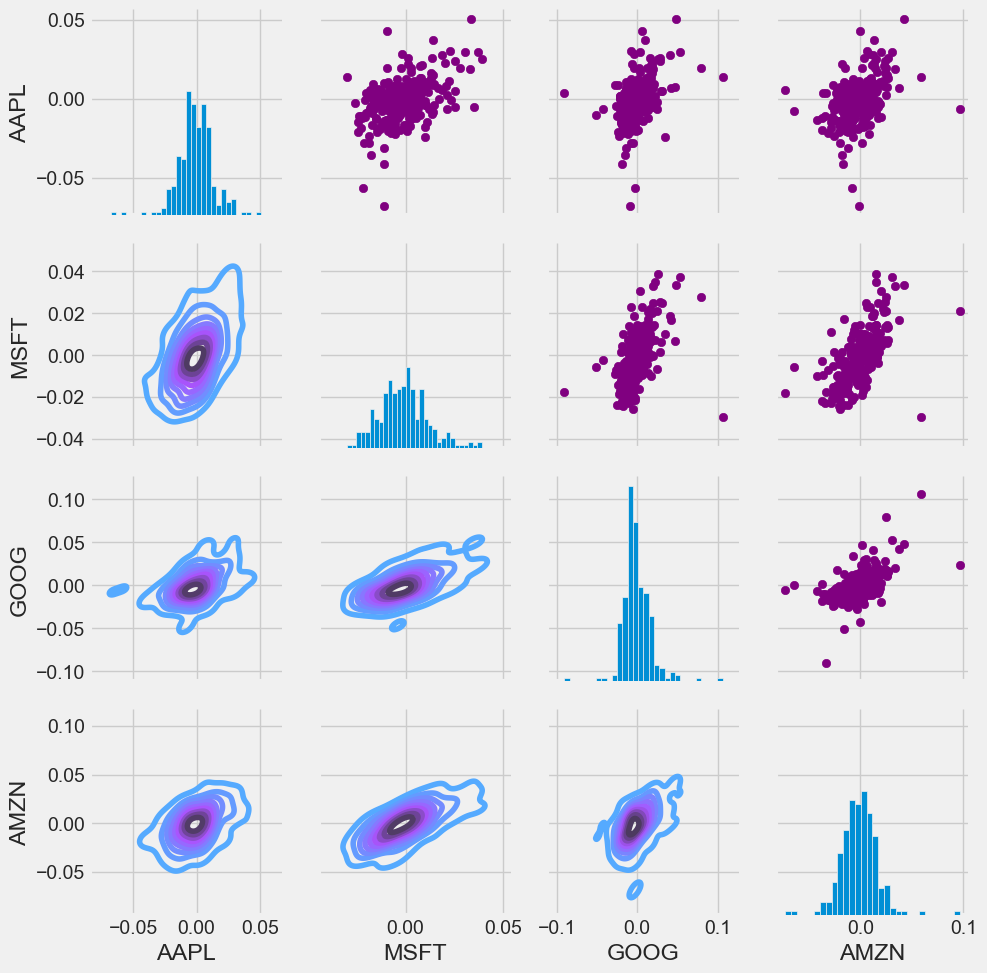

In [15]:
# Set up the figure by naming it return_fig, calls pairplot on DataFrame tech_ret
return_fig = sns.PairGrid(tech_ret.dropna())

# Using the map_upper, we can specify waht the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure including the plot type (kde) or color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we will define teh diagonal as a series of histogram plots of daily return
return_fig.map_diag(plt.hist, bins=30)

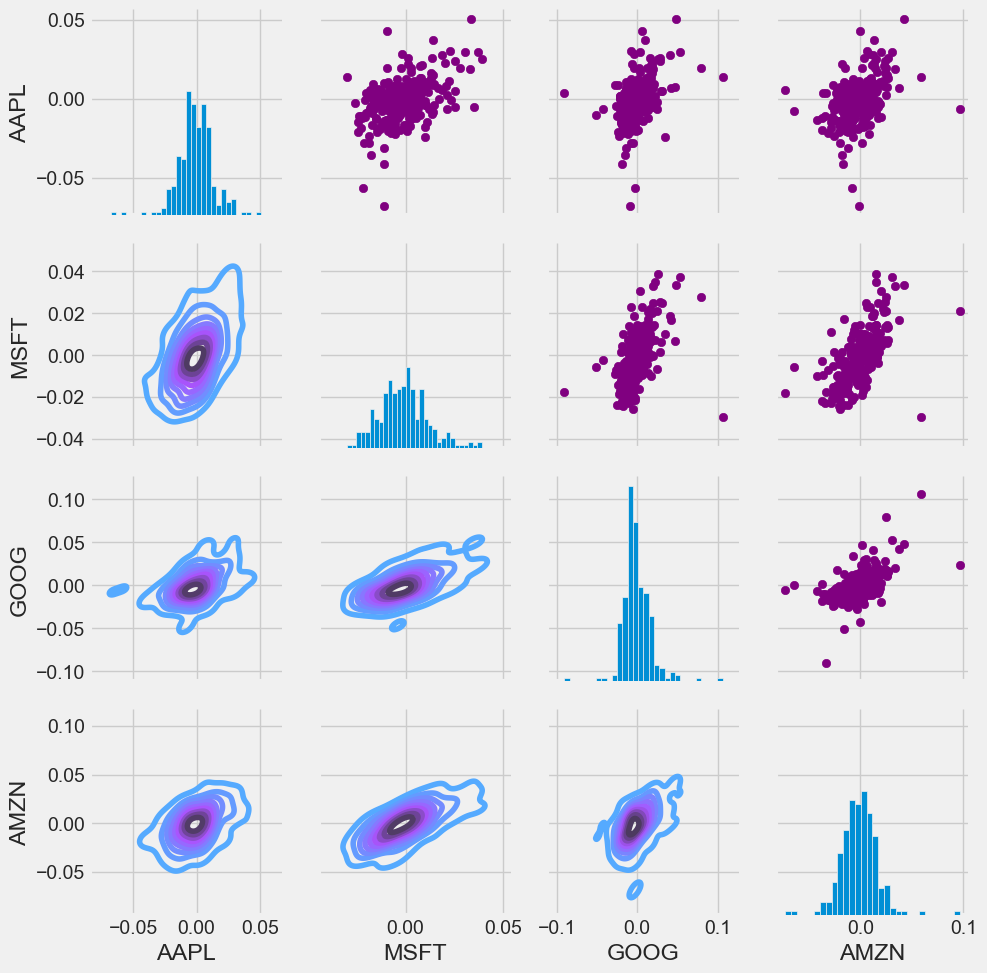

In [16]:
# Set up the figure by naming it return_fig, calls pairplot on DataFrame closing_df
return_fig = sns.PairGrid(tech_ret.dropna())

# Setting the upper triangle
return_fig.map_upper(plt.scatter, color='purple')

# Setting the lower triangle
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Defining the diagonal
return_fig.map_diag(plt.hist, bins=30)

Finally we can also do a correlation plot to get the actual numerical values for the correlation b/w the stocks's daily return values. By comparing the closing prices, wwe see an interesting realtionship b/w Microsoft and Amazon 

Text(0.5, 1.0, 'Correlation of closing price of stocks')

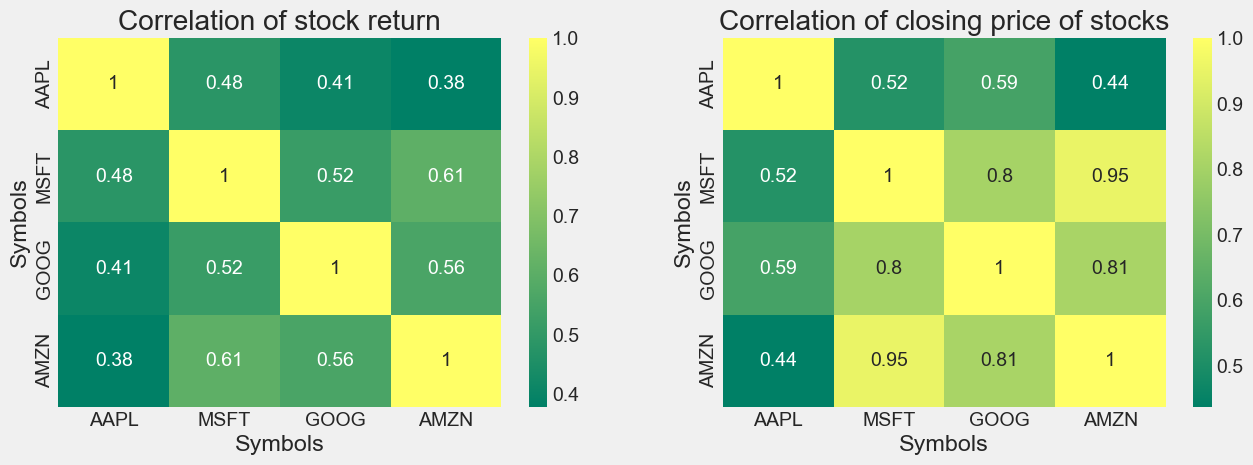

In [17]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.heatmap(tech_ret.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of closing price of stocks')

Just like the PairPlot we see the numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all technology companies are positively correlated

## 5.) How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways is using the information we've gathered on daily percentage returns by comparing the expected return with standard deviation of dailt returns 

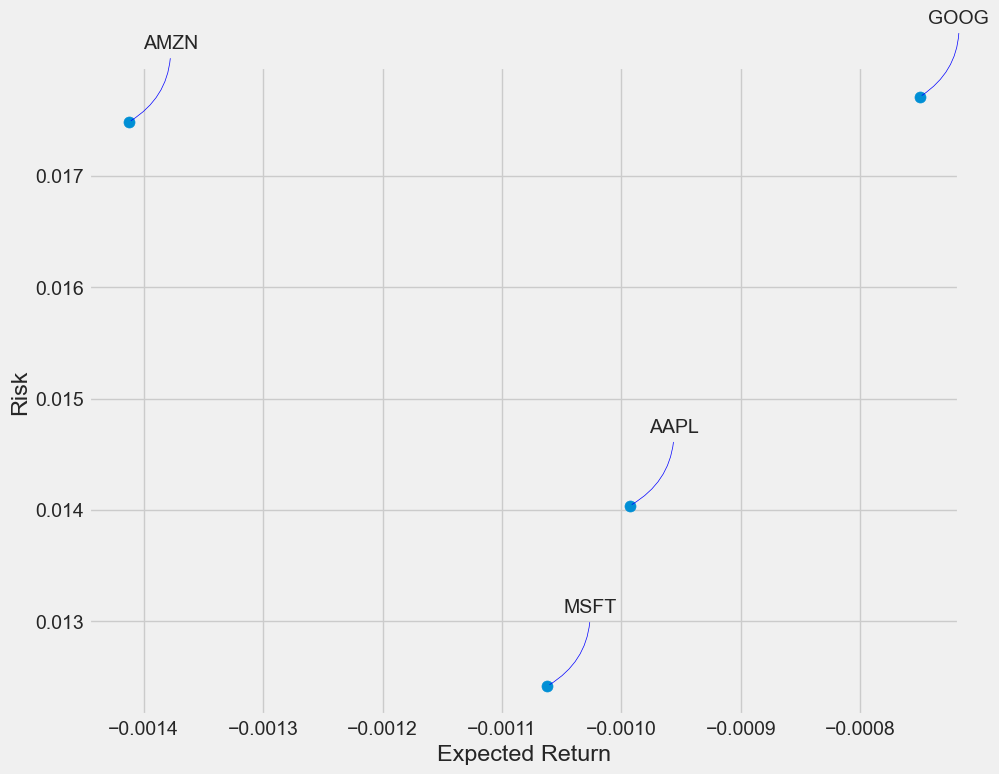

In [18]:
rets = tech_ret.dropna()

area = np.pi * 20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6.) Predicting thr closing stock price of APPLE Inc. 

In [19]:
# Getting the historical stock data
df = pdr.get_data_stooq('AAPL', start='2012-01-01', end=datetime.now())
df = df.reindex(index = df.index[::-1])

# show the data
df

Open      High       Low     Close        Volume
Date                                                            
2012-01-03   12.4779   12.5577   12.4520   12.5198  3.544907e+08
2012-01-04   12.4849   12.6235   12.4600   12.5866  3.051786e+08
2012-01-05   12.6314   12.7422   12.5627   12.7272  3.178972e+08
2012-01-06   12.7800   12.8717   12.7630   12.8608  3.734286e+08
2012-01-09   12.9525   13.0213   12.8289   12.8408  4.620092e+08
...              ...       ...       ...       ...           ...
2024-09-26  227.3000  228.5000  225.4100  227.5200  3.663671e+07
2024-09-27  228.4600  229.5200  227.3000  227.7900  3.402597e+07
2024-09-30  230.0400  233.0000  229.6500  233.0000  5.479339e+07
2024-10-01  229.5200  229.6500  223.7400  226.2100  6.328505e+07
2024-10-02  225.8900  227.3700  223.0200  226.7800  3.288060e+07

[3208 rows x 5 columns]

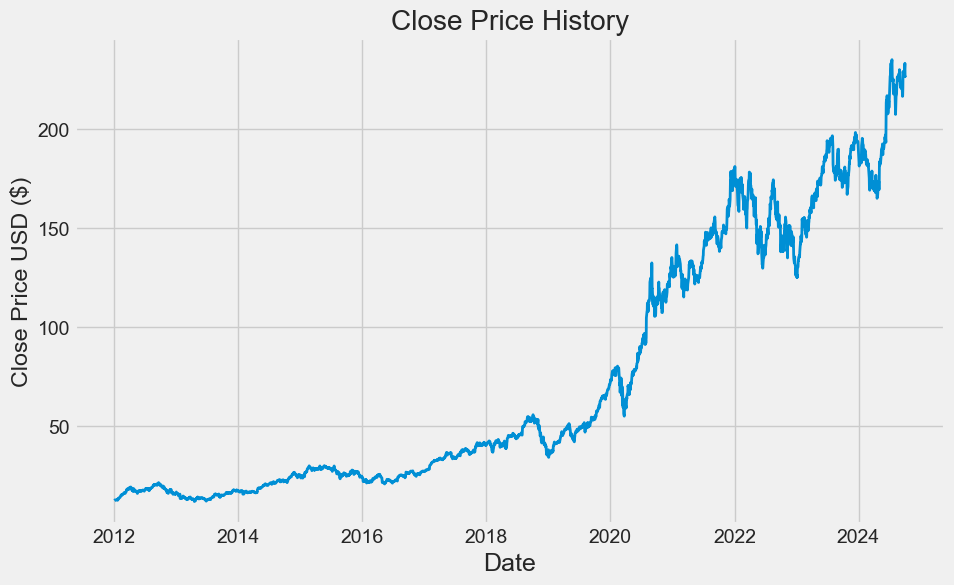

In [20]:
# Plotting the closing price
# sns.lineplot(df['Close'])
# or using matplot
plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [21]:
# Create a new DataFrame with only Close column
data = df.filter(['Close'])
# Convert the DataFrame to nd.array
dataset = data.values
# Get the no. of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*0.90))

training_data_len

2888

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00204529],
       [0.00234517],
       [0.00297635],
       ...,
       [0.99182962],
       [0.96134781],
       [0.96390666]])

In [23]:
# Create training data set
# Create scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train
x_train, y_train = [], []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0]) 
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to nd.arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00204529, 0.00234517, 0.00297635, 0.00357611, 0.00348633,
       0.00369238, 0.00359856, 0.00343695, 0.00321787, 0.0038715 ,
       0.00448428, 0.00429663, 0.00328521, 0.00425174, 0.00329868,
       0.00688332, 0.00661038, 0.00696862, 0.00774705, 0.00823054,
       0.00819058, 0.00804244, 0.00866016, 0.00925094, 0.0099131 ,
       0.01098737, 0.01323871, 0.01327463, 0.01453206, 0.01546761])]
[0.013860918548473253]

[array([0.00204529, 0.00234517, 0.00297635, 0.00357611, 0.00348633,
       0.00369238, 0.00359856, 0.00343695, 0.00321787, 0.0038715 ,
       0.00448428, 0.00429663, 0.00328521, 0.00425174, 0.00329868,
       0.00688332, 0.00661038, 0.00696862, 0.00774705, 0.00823054,
       0.00819058, 0.00804244, 0.00866016, 0.00925094, 0.0099131 ,
       0.01098737, 0.01323871, 0.01327463, 0.01453206, 0.01546761]), array([0.00234517, 0.00297635, 0.00357611, 0.00348633, 0.00369238,
       0.00359856, 0.00343695, 0.00321787, 0.0038715 , 0.00448428,
       0.00429663, 0.00328521, 0

(2858, 30, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2858/2858 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 0.0028


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 2564 to 3205 
test_data = scaled_data[training_data_len - 30:, :] 

# Create x_test from the test data
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert to numpy array 
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


12.448013339065943

In [28]:
predictions[:10]

array([[175.45447],
       [175.87532],
       [176.51079],
       [177.19345],
       [178.42679],
       [179.4737 ],
       [180.11397],
       [180.53262],
       [180.60774],
       [180.21648]], dtype=float32)

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_8808\1289335440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


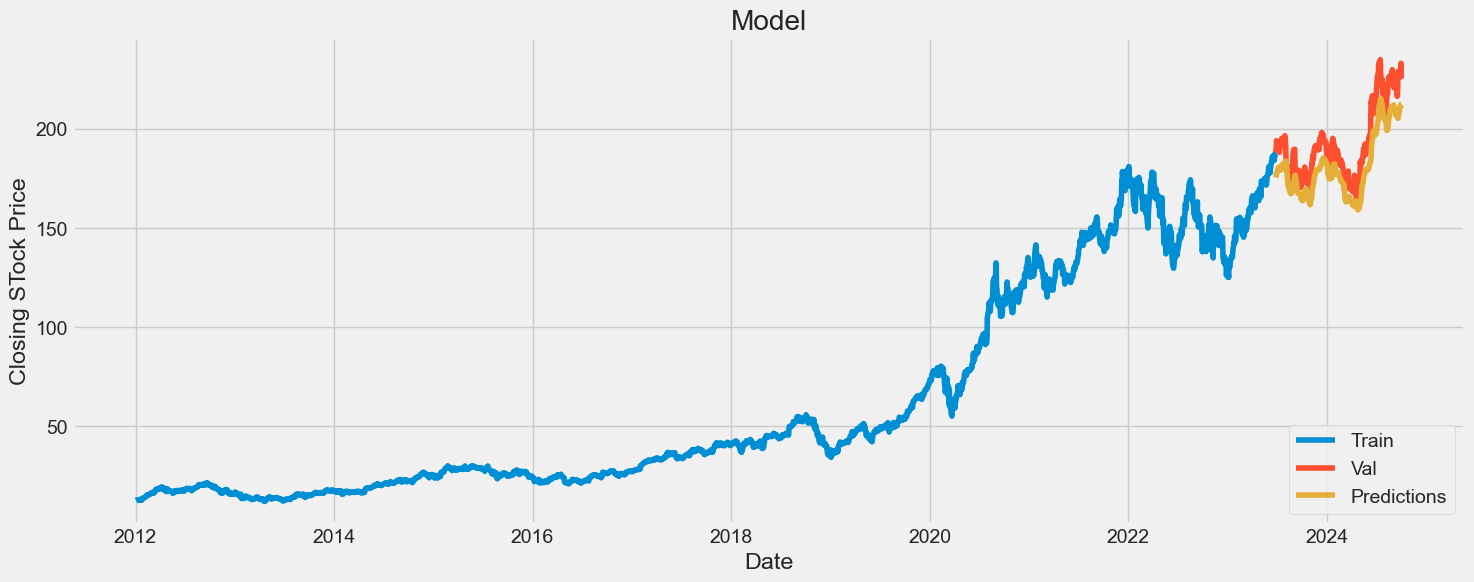

In [29]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

C:\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


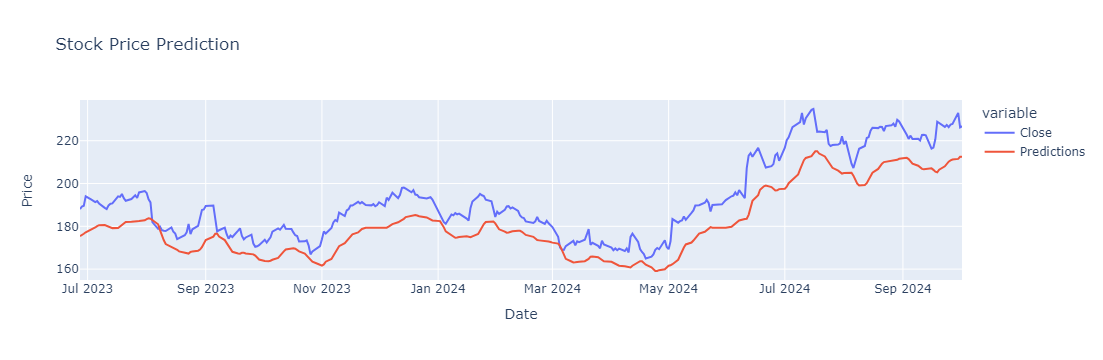

In [30]:
# Plotting using Plotly library
import plotly.express as px
import plotly.graph_objs as go
fig = px.line(valid, x=valid.index, y=['Close', 'Predictions'],labels={'index': 'Date', 'value': 'Price'},title='Stock Price Prediction')
fig.show()


In [31]:
# Show Valid and Predicted Values
valid

Close  Predictions
Date                           
2023-06-27  188.06   175.454468
2023-06-28  189.25   175.875320
2023-06-29  189.59   176.510788
2023-06-30  193.97   177.193451
2023-07-03  192.46   178.426788
...            ...          ...
2024-09-26  227.52   210.768417
2024-09-27  227.79   211.193863
2024-09-30  233.00   211.510666
2024-10-01  226.21   212.484329
2024-10-02  226.78   212.556824

[320 rows x 2 columns]

In [32]:
# We use the last 60 days of the training data to predict the next day
last_60_days = scaled_data[-60:]  # The most recent 60 days
x_next_day = np.array([last_60_days])
x_next_day = np.reshape(x_next_day, (x_next_day.shape[0], x_next_day.shape[1], 1))

# Predict the next day's closing price
next_day_prediction = model.predict(x_next_day)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

# Display the predicted price for the next day
print(f"Next day predicted closing price: {next_day_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Next day predicted closing price: 212.3590545654297
